In [6]:
#Adding all libraries 
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
sns.set_style("whitegrid")
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,VotingClassifier

In [7]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,roc_curve,auc,recall_score,precision_score
)
from sklearn.model_selection import cross_val_score

In [8]:
# Load the all the data from CSV files 
#train_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')
df_original = pd.read_csv('df_original.csv')
df_clean = pd.read_csv('df_clean.csv')
df = pd.read_csv('df_trim_2021.csv')

In [9]:
df.columns

Index(['Rpt Dist No', 'Vict Sex', 'Vict Descent', 'Date', 'Month', 'Hour',
       'Vict_Age1', 'Day', 'LatLon', 'Crime_Category'],
      dtype='object')

In [10]:
df.Crime_Category.value_counts()

Crime_Category
0    43928
1    24896
Name: count, dtype: int64

In [11]:
df.Crime_Category.value_counts()

Crime_Category
0    43928
1    24896
Name: count, dtype: int64

In [12]:
df.head(5)
#We know the age is repeatative but the way it is calculated is different. 
# Vict age is the exact number, 
#vict_age1 is stated bins classifier and 
# vict_age2 is equal frequency classisifer

,Rpt Dist No,Vict Sex,Vict Descent,Date,Month,Hour,Vict_Age1,Day,LatLon,Crime_Category
0,722,0,3,1,2,2,3,1,26852,0
1,1675,0,3,25,4,1,3,7,45042,0
2,236,0,4,7,2,5,3,7,24787,0
3,1148,0,3,25,1,1,3,1,31610,1
4,124,0,2,9,2,6,4,2,0,0


In [13]:
# Split the DataFrame into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=1)

# Save the subsets to separate CSV files
train_data.to_csv('train_2021_trim.csv', index=False)
test_data.to_csv('test_2021_trim.csv', index=False)


# Separate features and target variable for training data
x_train = train_data.drop(["Crime_Category"], axis=1)
y_train = train_data["Crime_Category"]

# Separate features and target variable for testing data
x_test = test_data.drop(["Crime_Category"], axis=1)
y_test = test_data["Crime_Category"]

In [14]:
#Faced issue earlier that there was discrepancy in the number of rows
#Hence, checking the shape of the datasets. 
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (48176, 9)
y_train (48176,)
x_test (20648, 9)
y_test (20648,)


In [15]:
#checking if there are any null values 
x_train.isnull().sum()

Rpt Dist No     0
Vict Sex        0
Vict Descent    0
Date            0
Month           0
Hour            0
Vict_Age1       0
Day             0
LatLon          0
dtype: int64

In [16]:
x_test.isnull().sum()

Rpt Dist No     0
Vict Sex        0
Vict Descent    0
Date            0
Month           0
Hour            0
Vict_Age1       0
Day             0
LatLon          0
dtype: int64

In [17]:
#Creating separate X and Y 
x = df.drop(["Crime_Category"], axis=1)
y = df.Crime_Category.values

In [18]:
df.Crime_Category.value_counts()

Crime_Category
0    43928
1    24896
Name: count, dtype: int64

## Data Analysis - Part 1 
In this part, our output category has 6 values. We will perform all analysis for this particular thing. 

In [19]:
#labels & classes 
labels = [0,1]
classes = [0,1]

## Cost Matrix 
cost_matrix = np.array([[10,-100],  # a: Cost of True Positive, b: Cost of False Negative
                        [150,-10]]) # c: Cost of False Positive, d: Cost of True Negative

In [20]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

### Naive Bayes

Train Confusion matrix


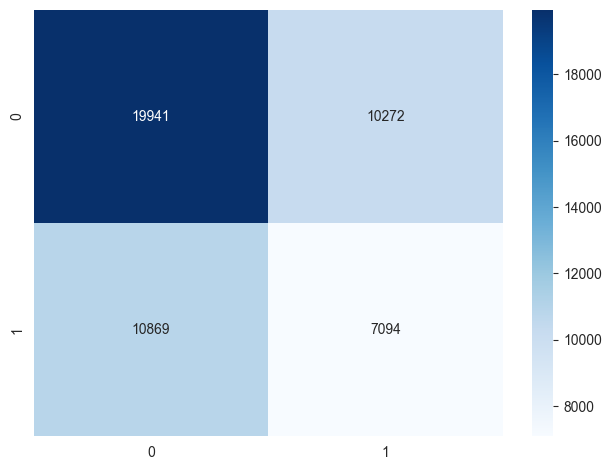

Test Confusion matrix


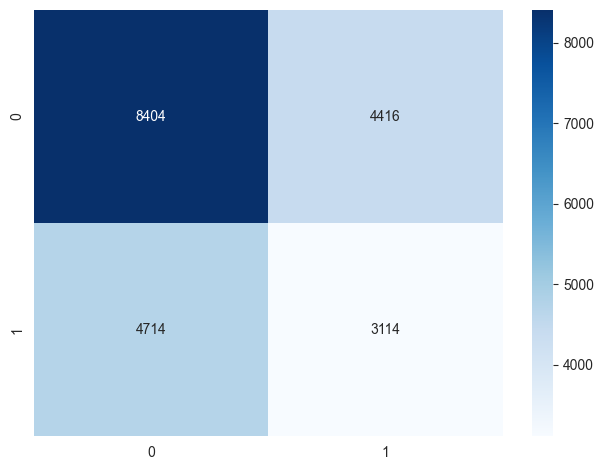

TEST ACCURACY  MultinomialNB  is : 0.5578264238667183
TRAIN ACCURACY MultinomialNB  is : 0.5611715376951179
EXPECTED VALUE  MultinomialNB  is : 243900
___________________________
F-1 SCORE  MultinomialNB  is : 0.5595762446598102
RECALL  MultinomialNB  is : 0.41354581673306773
PRECISION  MultinomialNB  is : 0.3978027593254982
Train Confusion matrix


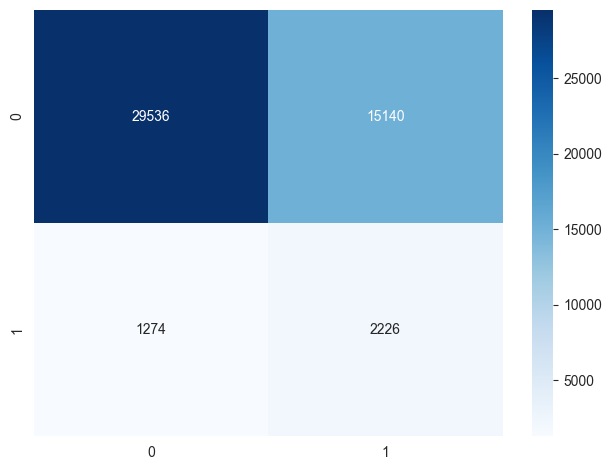

Test Confusion matrix


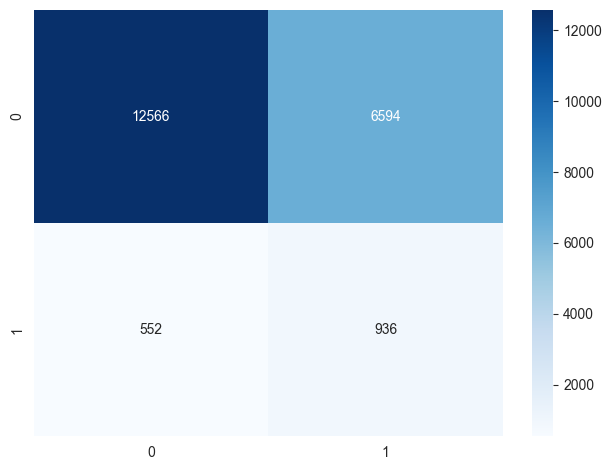

TEST ACCURACY  GaussianNB  is : 0.6539132119333592
TRAIN ACCURACY GaussianNB  is : 0.6592909332447692
EXPECTED VALUE  GaussianNB  is : 1050200
___________________________
F-1 SCORE  GaussianNB  is : 0.5595762446598102
RECALL  GaussianNB  is : 0.12430278884462151
PRECISION  GaussianNB  is : 0.6290322580645161
Train Confusion matrix


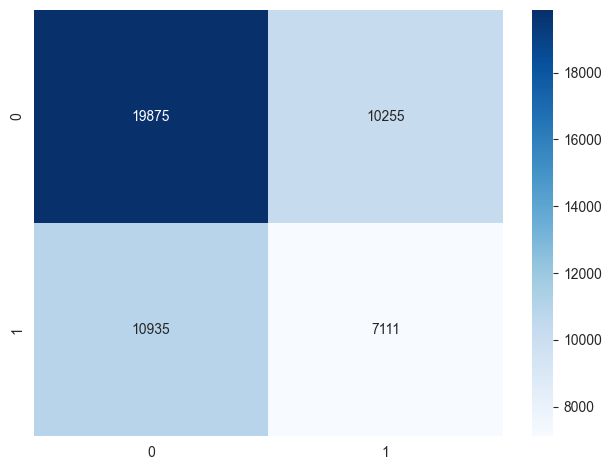

Test Confusion matrix


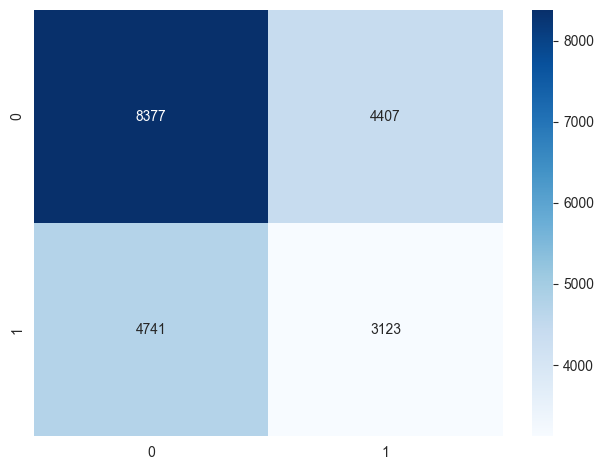

TEST ACCURACY  ComplementNB  is : 0.5569546687330492
TRAIN ACCURACY ComplementNB  is : 0.5601544337429425
EXPECTED VALUE  ComplementNB  is : 239490
___________________________
F-1 SCORE  ComplementNB  is : 0.5595762446598102
RECALL  ComplementNB  is : 0.4147410358565737
PRECISION  ComplementNB  is : 0.39712614445574773
Train Confusion matrix


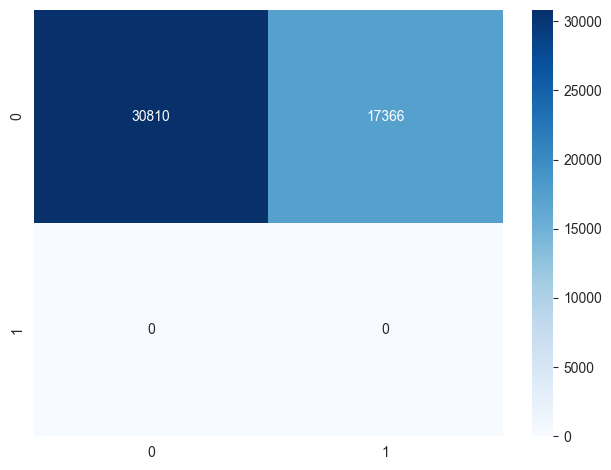

Test Confusion matrix


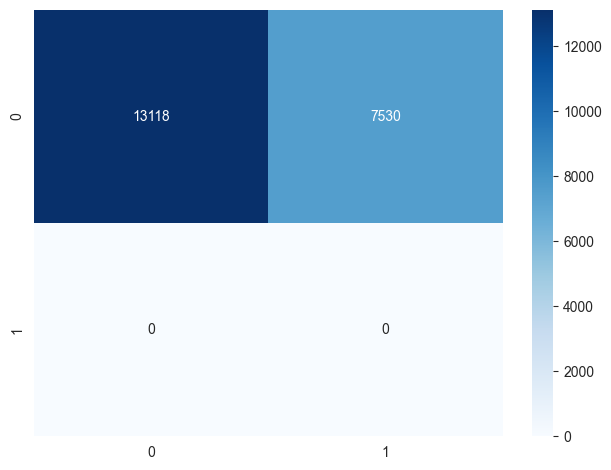

TEST ACCURACY  BernoulliNB  is : 0.6353157690817512
TRAIN ACCURACY BernoulliNB  is : 0.639530056459648
EXPECTED VALUE  BernoulliNB  is : 1260680
___________________________
F-1 SCORE  BernoulliNB  is : 0.5595762446598102
RECALL  BernoulliNB  is : 0.0
PRECISION  BernoulliNB  is : 0.0


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
'''We will look into Naive Bayes models 
1. Multinomial Naive Bayes - MultinomialNB
2. Gaussian Naive Bayes - GaussianNB
3. Complement Naive Bayes - ComplementNB
4. Bernoulli Naive Bayes - BernoulliNB

'''
#Defining all the models as a dictionary
NB_models = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

#for every model in NB model, we will run all the code to calculate everything in one go 
#took reference from ensemble learning code. 

for name, classifier in NB_models.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    Recall = recall_score(y_test, y_pred)
    Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    print("F-1 SCORE ",name," is :", f1_score)
    print("RECALL ",name," is :", Recall)
    print("PRECISION ",name," is :", Precision)


### Decision Trees

Train Confusion matrix


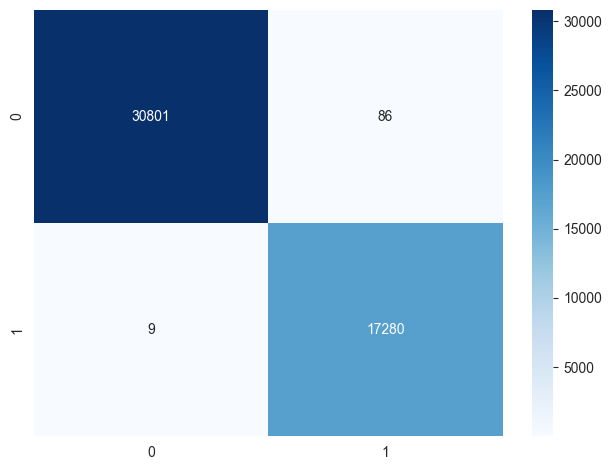

Test Confusion matrix


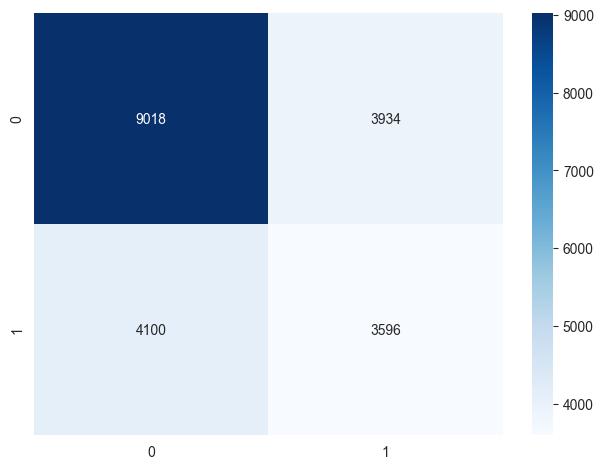

TEST ACCURACY  GiniTree_NoEstimators  is : 0.6109066253390159
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9980280637661907
EXPECTED VALUE  GiniTree_NoEstimators  is : 234320
___________________________
F-1 SCORE  GiniTree_NoEstimators  is : 0.5595762446598102
RECALL  GiniTree_NoEstimators  is : 0.47755644090305444
PRECISION  GiniTree_NoEstimators  is : 0.46725571725571724
Train Confusion matrix


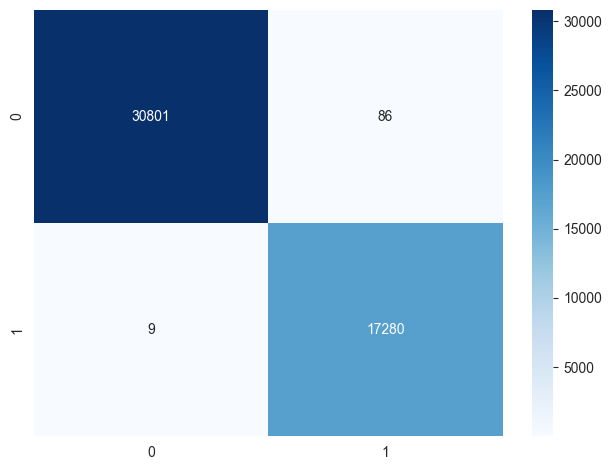

Test Confusion matrix


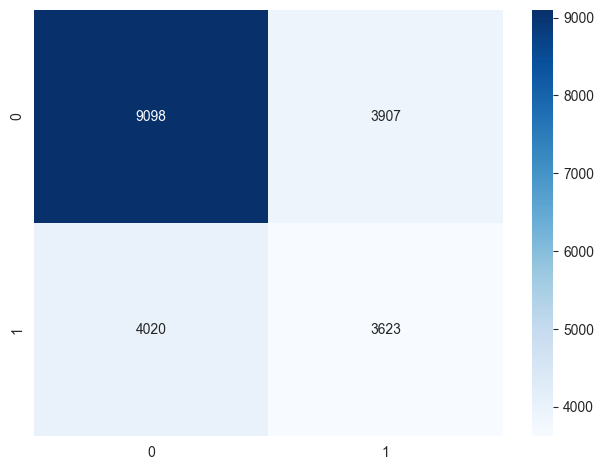

TEST ACCURACY  EntropyTree_NoEstimators  is : 0.6160887253002713
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9980280637661907
EXPECTED VALUE  EntropyTree_NoEstimators  is : 238800
___________________________
F-1 SCORE  EntropyTree_NoEstimators  is : 0.5595762446598102
RECALL  EntropyTree_NoEstimators  is : 0.48114209827357235
PRECISION  EntropyTree_NoEstimators  is : 0.47402852283134894
Train Confusion matrix


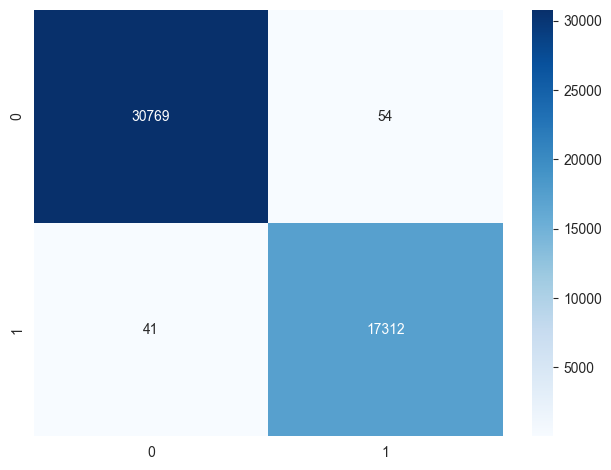

Test Confusion matrix


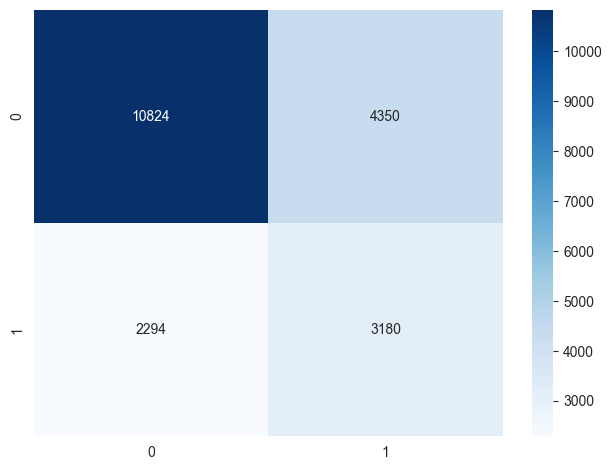

TEST ACCURACY  RandomForest  is : 0.6782254939945758
TRAIN ACCURACY RandomForest  is : 0.9980280637661907
EXPECTED VALUE  RandomForest  is : 499540
___________________________
F-1 SCORE  RandomForest  is : 0.5595762446598102
RECALL  RandomForest  is : 0.42231075697211157
PRECISION  RandomForest  is : 0.5809280233832663
Train Confusion matrix


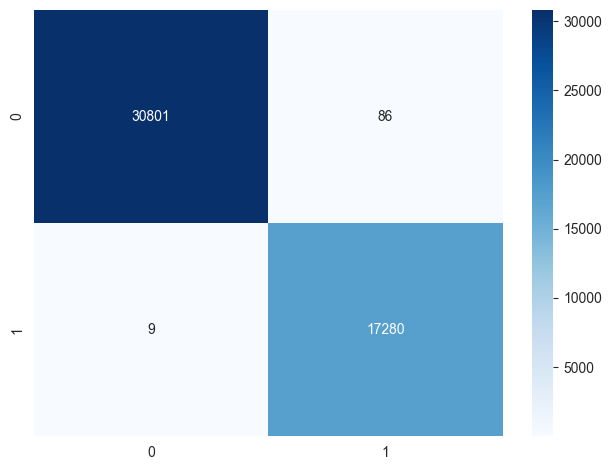

Test Confusion matrix


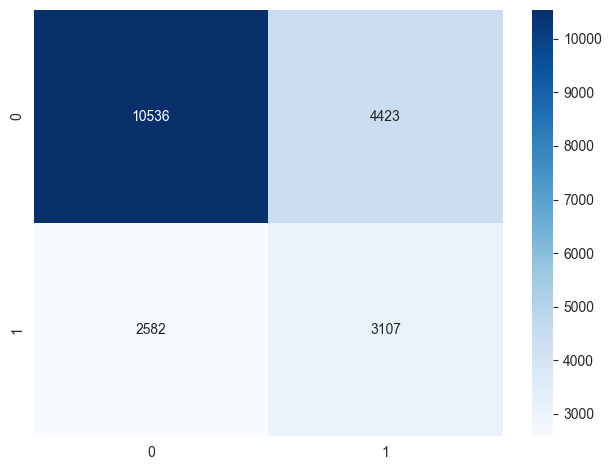

TEST ACCURACY  ExtraTrees_Gini  is : 0.660741960480434
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9980280637661907
EXPECTED VALUE  ExtraTrees_Gini  is : 479540
___________________________
F-1 SCORE  ExtraTrees_Gini  is : 0.5595762446598102
RECALL  ExtraTrees_Gini  is : 0.41261620185922976
PRECISION  ExtraTrees_Gini  is : 0.5461416769203726
Train Confusion matrix


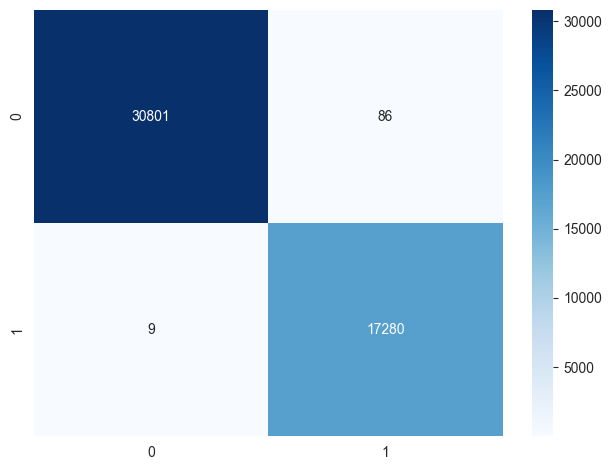

Test Confusion matrix


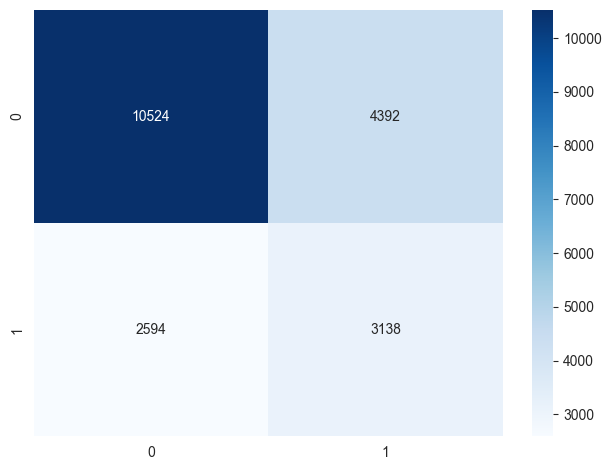

TEST ACCURACY  ExtraTrees_Entropy  is : 0.6616621464548624
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9980280637661907
EXPECTED VALUE  ExtraTrees_Entropy  is : 473260
___________________________
F-1 SCORE  ExtraTrees_Entropy  is : 0.5595762446598102
RECALL  ExtraTrees_Entropy  is : 0.41673306772908364
PRECISION  ExtraTrees_Entropy  is : 0.5474528960223308


In [27]:
'''
In this section, we will look at decision tree models

1. tree.DecisionTreeClassifier(criterion='gini', random_state=42)
2.  tree.DecisionTreeClassifier(criterion='entropy', random_state=42) 
3.Extremely Randomized Trees
4. Random Forest - RandomForestClassifier(random_state=42)
'''

Tree_models_42 = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'RandomForest' : RandomForestClassifier(random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}

#took reference from ensemble learning code. 

for name, classifier in Tree_models_42.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    Recall = recall_score(y_test, y_pred)
    Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    print("F-1 SCORE ",name," is :", f1_score)
    print("RECALL ",name," is :", Recall)
    print("PRECISION ",name," is :", Precision)

Up until now, Random forest give us the best results with maximum EV. Now let's try to improve the performances of these models. 

* We will do pre-pruning and post pruning to see improvements. 
* After that for both the types of models, we will perform cross validation. 

Best Fit Model: DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
Train Confusion matrix


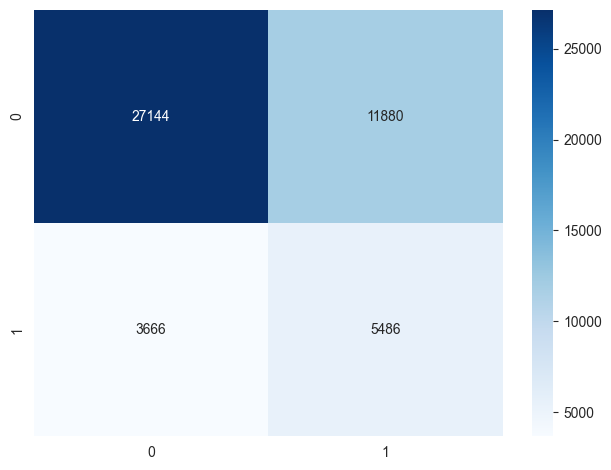

Test Confusion matrix


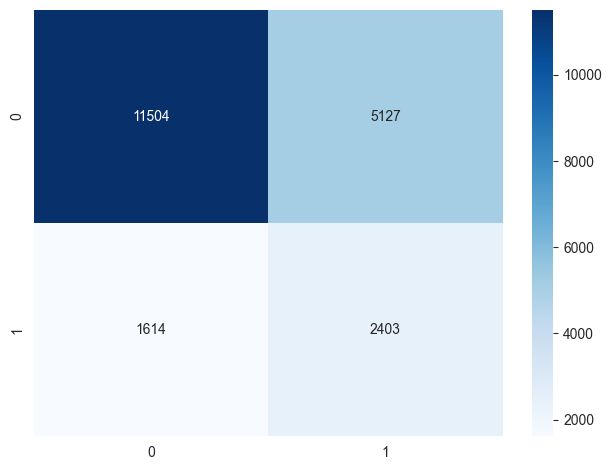

TEST ACCURACY is: 0.6735277024409144
TRAIN ACCURACY is: 0.6773082032547326
EXPECTED VALUE is: 698660


In [28]:
params = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
gcv = GridSearchCV(estimator=classifier, param_grid=params)
gcv.fit(x_train, y_train)

modelgcv = gcv.best_estimator_
print("Best Fit Model:", modelgcv)

modelgcv.fit(x_train, y_train)

# Predictions
y_pred = modelgcv.predict(x_test)
y_pred_train = modelgcv.predict(x_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
plot_confusionmatrix(y_pred_train,y_train,dom='Train')
plot_confusionmatrix(y_pred,y_test,dom='Test')
    
# Calculating Expected Value
EV = np.sum(cm * cost_matrix)

# Calculating other scores
#f1 = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass
#Precision = precision_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass

# Printing results
print("TEST ACCURACY is:", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY is:", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE is:", EV)
#print("F-1 SCORE is:", f1)
#print("RECALL is:", Recall)
#print("PRECISION is:", Precision)

Best Fit Model for GiniTree_NoEstimators DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=42)
Train Confusion matrix


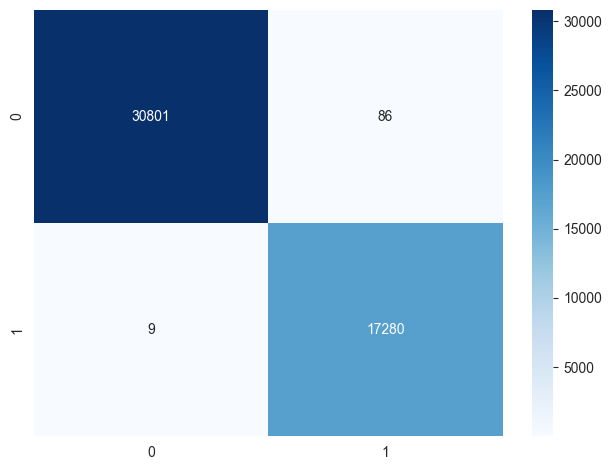

Test Confusion matrix


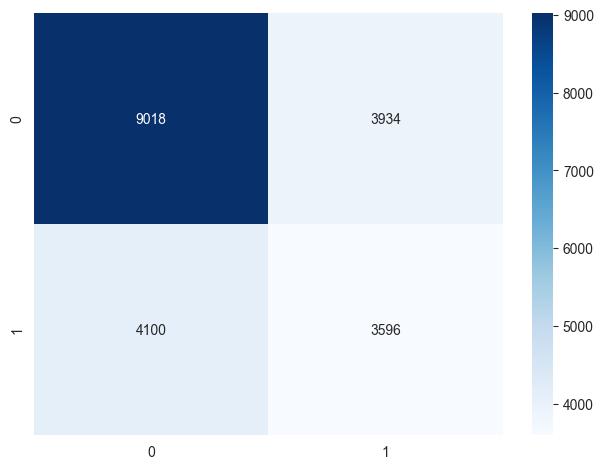

TEST ACCURACY  GiniTree_NoEstimators  is : 0.6109066253390159
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9980280637661907
EXPECTED VALUE  GiniTree_NoEstimators  is : 234320
___________________________
Best Fit Model for EntropyTree_NoEstimators DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=42)
Train Confusion matrix


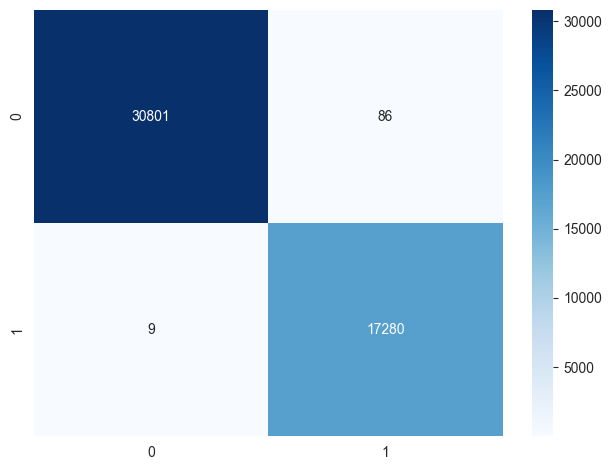

Test Confusion matrix


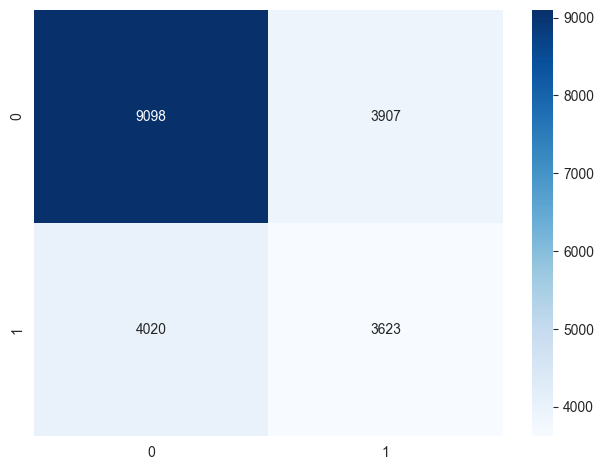

TEST ACCURACY  EntropyTree_NoEstimators  is : 0.6160887253002713
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9980280637661907
EXPECTED VALUE  EntropyTree_NoEstimators  is : 238800
___________________________
Best Fit Model for RandomForest RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=42)
Train Confusion matrix


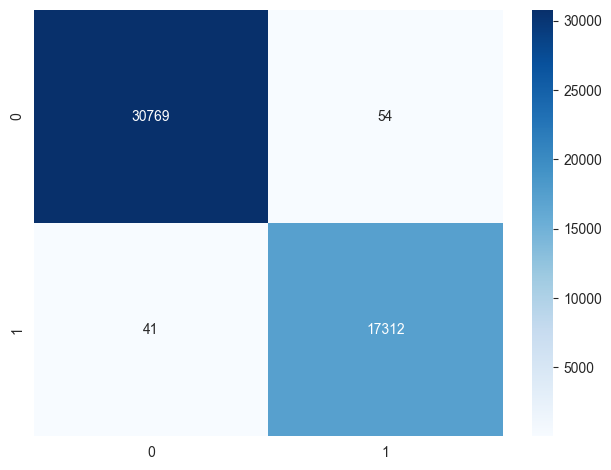

Test Confusion matrix


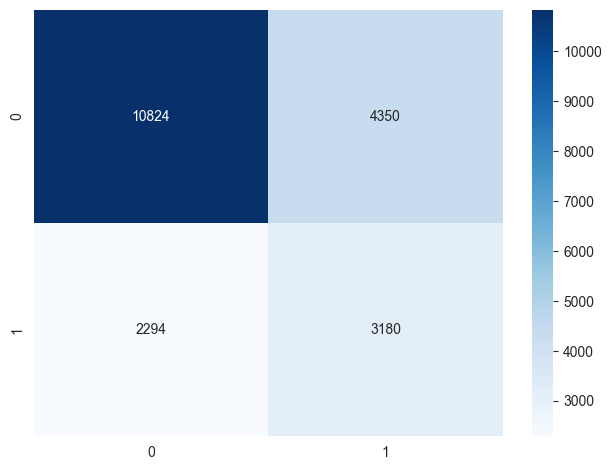

TEST ACCURACY  RandomForest  is : 0.6782254939945758
TRAIN ACCURACY RandomForest  is : 0.9980280637661907
EXPECTED VALUE  RandomForest  is : 499540
___________________________
Best Fit Model for ExtraTrees_Gini ExtraTreesClassifier(max_depth=6, min_samples_leaf=3, random_state=42)
Train Confusion matrix


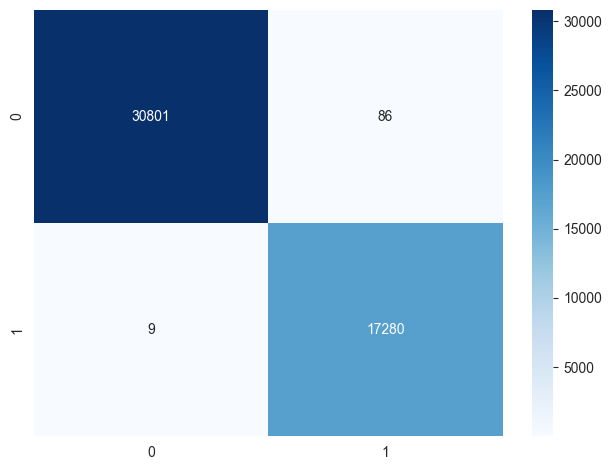

Test Confusion matrix


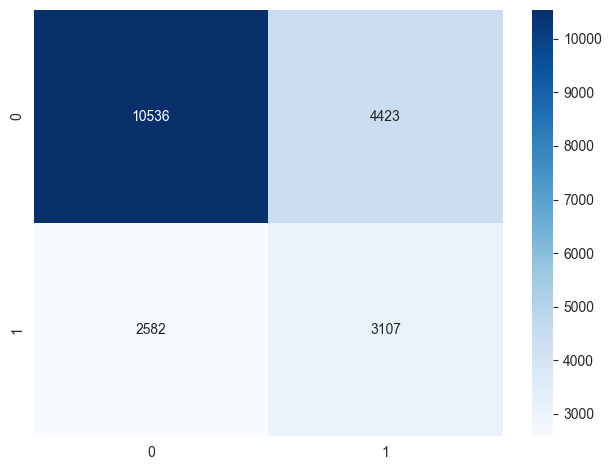

TEST ACCURACY  ExtraTrees_Gini  is : 0.660741960480434
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9980280637661907
EXPECTED VALUE  ExtraTrees_Gini  is : 479540
___________________________
Best Fit Model for ExtraTrees_Entropy ExtraTreesClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                     random_state=42)
Train Confusion matrix


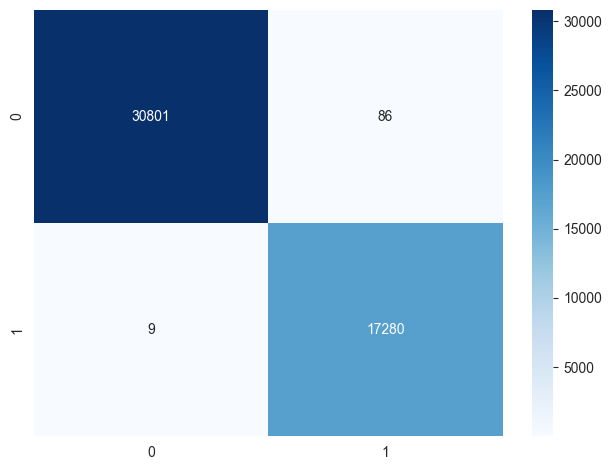

Test Confusion matrix


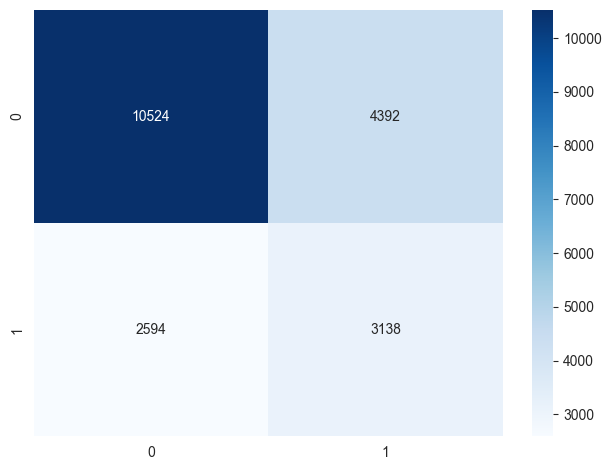

TEST ACCURACY  ExtraTrees_Entropy  is : 0.6616621464548624
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9980280637661907
EXPECTED VALUE  ExtraTrees_Entropy  is : 473260
___________________________


In [29]:
# Pre-pruning 
for name, classifier in Tree_models_42.items():
    
    # parameters 
    params = {'max_depth': [2,4,6],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [2,3]}
    
    
    gcv = GridSearchCV(estimator=classifier,param_grid=params)
    gcv.fit(x_train,y_train)

    modelgcv = gcv.best_estimator_
    print("Best Fit Model for", name, modelgcv)
    

    modelgcv.fit(x_train,y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

In [30]:
#Post Pruning 
Tree_models_new = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'GiniTree_BestGCV' : tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42), 
    'EntropyTree_BestGCV' : tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42),
    #'RandomForest' : RandomForestClassifier(random_state=42),
    #'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    #'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}
for name, model in Tree_models_new.items():
    path = model.cost_complexity_pruning_path(x_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    print(name)
    print(ccp_alphas)
    print(ccp_alphas.shape)
    print(max(ccp_alphas))
    ccp_alphas2 = np.arange(0,max(ccp_alphas),0.001)
    print("______________________")


GiniTree_NoEstimators
[0.         0.         0.         ... 0.00098537 0.00966338 0.01497639]
(5416,)
0.014976393101687024
______________________
EntropyTree_NoEstimators
[0.         0.         0.         ... 0.00180347 0.01506561 0.02500035]
(5088,)
0.02500034795518613
______________________
GiniTree_BestGCV
[0.00000000e+00 6.98907687e-06 1.20331731e-05 1.61524266e-05
 2.07572235e-05 2.16726042e-05 2.82893567e-05 2.89187324e-05
 3.75541873e-05 3.97471026e-05 4.10043870e-05 4.39379013e-05
 4.46262959e-05 5.32805737e-05 5.53525960e-05 5.71224908e-05
 5.75034789e-05 6.47123598e-05 6.57683451e-05 6.96614128e-05
 7.06424038e-05 7.08030394e-05 9.32923680e-05 9.50761956e-05
 9.72718832e-05 1.04961724e-04 1.16457190e-04 1.45805767e-04
 1.49882577e-04 1.53753201e-04 2.05078968e-04 2.06639722e-04
 2.60580267e-04 2.74607931e-04 2.97915705e-04 3.21140594e-04
 3.57158928e-04 4.93447064e-04 5.20499772e-04 5.97005688e-04
 7.42276339e-04 7.75753340e-04 9.25672212e-04 9.85365417e-04
 9.66338125e-03 1.

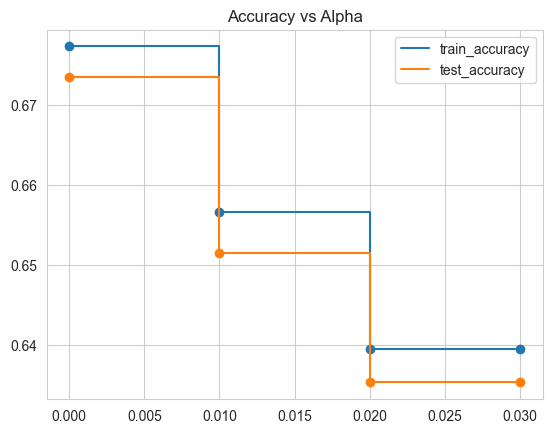

In [31]:
#For Entropy Tree GCV 
ccp_alphas2 = np.arange(0,0.037,0.01)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [32]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

TEST ACCURACY  EntropyTree_BestGCV  is : 0.6734308407593956
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.6772666888077051
EXPECTED VALUE  EntropyTree_BestGCV  is : 698980
___________________________


In [34]:
#Gini GCV model
ccp_alphas2 = np.arange(0,0.0167,0.001)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=ccp_alphas2)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

InvalidParameterError: The 'ccp_alpha' parameter of DecisionTreeClassifier must be a float in the range [0.0, inf). Got array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016]) instead.

In [35]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

TEST ACCURACY  EntropyTree_BestGCV  is : 0.673721425803952
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.6773289604782464
EXPECTED VALUE  EntropyTree_BestGCV  is : 696940
___________________________


Stratified sampling for all the models 

### Stratified Sampling

#### Stratified Sampling - Naive Bayes Models

In [36]:
#Creating stratified sample 

stratified_sample =  StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Empty list to maintain all the scores
scores = []

#For loops for all calculations 
for model_name,model in NB_models.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.5567
Fold 2: Accuracy: 0.5701
Fold 3: Accuracy: 0.5601
Fold 4: Accuracy: 0.5612
Fold 5: Accuracy: 0.5687
Fold 6: Accuracy: 0.5568
Fold 7: Accuracy: 0.5573
Fold 8: Accuracy: 0.5554
Fold 9: Accuracy: 0.5610
Fold 10: Accuracy: 0.5587
Average Score for MultinomialNB is 0.5606037758266484
Fold 1: Accuracy: 0.5567
Fold 2: Accuracy: 0.5701
Fold 3: Accuracy: 0.5601
Fold 4: Accuracy: 0.5612
Fold 5: Accuracy: 0.5687
Fold 6: Accuracy: 0.5568
Fold 7: Accuracy: 0.5573
Fold 8: Accuracy: 0.5554
Fold 9: Accuracy: 0.5610
Fold 10: Accuracy: 0.5587
Fold 11: Accuracy: 0.6570
Fold 12: Accuracy: 0.6579
Fold 13: Accuracy: 0.6528
Fold 14: Accuracy: 0.6567
Fold 15: Accuracy: 0.6582
Fold 16: Accuracy: 0.6638
Fold 17: Accuracy: 0.6635
Fold 18: Accuracy: 0.6549
Fold 19: Accuracy: 0.6575
Fold 20: Accuracy: 0.6574
Average Score for GaussianNB is 0.6092787529835563
Fold 1: Accuracy: 0.5567
Fold 2: Accuracy: 0.5701
Fold 3: Accuracy: 0.5601
Fold 4: Accuracy: 0.5612
Fold 5: Accuracy: 0.5687
Fold 6: 

#### Stratified Sampling - Tree Models

In [37]:
#For loops for all calculations 
for model_name,model in Tree_models_42.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.5567
Fold 2: Accuracy: 0.5701
Fold 3: Accuracy: 0.5601
Fold 4: Accuracy: 0.5612
Fold 5: Accuracy: 0.5687
Fold 6: Accuracy: 0.5568
Fold 7: Accuracy: 0.5573
Fold 8: Accuracy: 0.5554
Fold 9: Accuracy: 0.5610
Fold 10: Accuracy: 0.5587
Fold 11: Accuracy: 0.6570
Fold 12: Accuracy: 0.6579
Fold 13: Accuracy: 0.6528
Fold 14: Accuracy: 0.6567
Fold 15: Accuracy: 0.6582
Fold 16: Accuracy: 0.6638
Fold 17: Accuracy: 0.6635
Fold 18: Accuracy: 0.6549
Fold 19: Accuracy: 0.6575
Fold 20: Accuracy: 0.6574
Fold 21: Accuracy: 0.5556
Fold 22: Accuracy: 0.5692
Fold 23: Accuracy: 0.5593
Fold 24: Accuracy: 0.5604
Fold 25: Accuracy: 0.5677
Fold 26: Accuracy: 0.5555
Fold 27: Accuracy: 0.5561
Fold 28: Accuracy: 0.5541
Fold 29: Accuracy: 0.5607
Fold 30: Accuracy: 0.5578
Fold 31: Accuracy: 0.6382
Fold 32: Accuracy: 0.6382
Fold 33: Accuracy: 0.6382
Fold 34: Accuracy: 0.6382
Fold 35: Accuracy: 0.6383
Fold 36: Accuracy: 0.6383
Fold 37: Accuracy: 0.6383
Fold 38: Accuracy: 0.6383
Fold 39: Accuracy: 0.

### Ensemble Learning 

Ensemble learning 
* Simple averaging 
* Boosting 
* Bagging 

#### Simple Averaging

In [38]:
x_train.shape

(48176, 9)

In [39]:
y_train.shape

(48176,)

In [40]:
models_dict = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42),
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

for name, classifier in models_dict.items():
    #fit the model 
    classifier.fit(x_train, y_train)
    #make prediciton 
    #Calculating all the predicitons 
    y_pred = classifier.predict(x_test)
    y_pred_train =  classifier.predict(x_train)
    
    #confusion matrix 
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)

TEST ACCURACY  GiniTree_NoEstimators  is : 0.6109066253390159
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9980280637661907
EXPECTED VALUE  GiniTree_NoEstimators  is : 234320
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.6160887253002713
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9980280637661907
EXPECTED VALUE  EntropyTree_NoEstimators  is : 238800
TEST ACCURACY  ExtraTrees_Gini  is : 0.660741960480434
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9980280637661907
EXPECTED VALUE  ExtraTrees_Gini  is : 479540
TEST ACCURACY  ExtraTrees_Entropy  is : 0.6616621464548624
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9980280637661907
EXPECTED VALUE  ExtraTrees_Entropy  is : 473260
TEST ACCURACY  MultinomialNB  is : 0.5578264238667183
TRAIN ACCURACY MultinomialNB  is : 0.5611715376951179
EXPECTED VALUE  MultinomialNB  is : 243900
TEST ACCURACY  GaussianNB  is : 0.6539132119333592
TRAIN ACCURACY GaussianNB  is : 0.6592909332447692
EXPECTED VALUE  GaussianNB  is : 1050200
TEST ACCURACY  Complement

In [41]:
#HARD VOTING
models_dict_2 = [('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())]


model = VotingClassifier(estimators=[('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())], voting='hard')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)

Train accuracy:  0.8047160411823314
Test accuracy:  0.655366137156141
Expected Value:  932000


In [42]:
#SOFT VOTING
model = VotingClassifier(estimators=models_dict_2, voting='soft')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)


Train accuracy:  0.9979450348721355
Test accuracy:  0.650232468035645
Expected Value:  542610


#### Bagging

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  MultinomialNB  is : 0.5577295621851995
TRAIN ACCURACY MultinomialNB  is : 0.5610469943540352
EXPECTED VALUE  MultinomialNB  is : 243140
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  GaussianNB  is : 0.6537679194110809
TRAIN ACCURACY GaussianNB  is : 0.6591456326801727
EXPECTED VALUE  GaussianNB  is : 1050680
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  ComplementNB  is : 0.556809376210771
TRAIN ACCURACY ComplementNB  is : 0.5600921620724012
EXPECTED VALUE  ComplementNB  is : 238620
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  BernoulliNB  is : 0.6353157690817512
TRAIN ACCURACY BernoulliNB  is : 0.639530056459648
EXPECTED VALUE  BernoulliNB  is : 1260680
___________________________
Train accuracy of RandomForest algo:  0.9980280637661907
Test accuracy of RandomForest algo:  0.6793394033320418
Expected Value of RandomForest algo:  507200


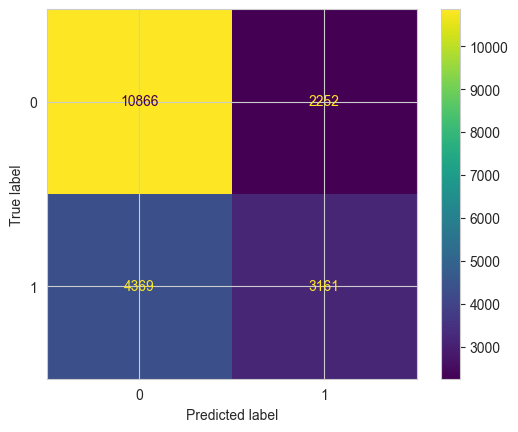

In [43]:
#### Bagging for Naives Bayes models 

from sklearn.ensemble import BaggingClassifier

for name, classifier in NB_models.items():
    
    model = BaggingClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)



# Bagging with Random Forest Classifier 
# Build a Gaussian Classifier
modelMNB = RandomForestClassifier()
modelMNB.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelMNB.predict(x_test)
y_pred_train =  modelMNB.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelMNB.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelMNB.predict(x_test))

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of RandomForest algo: ", mnb_train_accuracy)
print("Test accuracy of RandomForest algo: ", mnb_test_accuracy)
print("Expected Value of RandomForest algo: ", EV_MNB)



#### Boosting

In [44]:
#Adaboost for all our models 
from sklearn.ensemble import AdaBoostClassifier

for name, classifier in models_dict.items():
    
    model = AdaBoostClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
#XGBoost 
import xgboost as xgb

# Build a Gaussian Classifier
modelXG = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42, 
                                 booster='gbtree', subsample=0.8, colsample_bytree=0.8)
modelXG.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelXG.predict(x_test)
y_pred_train =  modelXG.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelXG.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelXG.predict(x_test))

#Confusion matrix 
labels = [0,1,2,3,4,5]
classes = [0,1,2,3,4,5]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of XGBoost algo: ", mnb_train_accuracy)
print("Test accuracy of XGBoost algo: ", mnb_test_accuracy)
print("Expected Value of XGBoost algo: ", EV_MNB)


Guassian NB gave highest accuracy, so we will do feature selection according to it. 

### SMOTE


In [45]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [48]:
from imblearn.over_sampling import SMOTE


# Creating a SMOTE object
smote = SMOTE()

# Generating the oversampled dataset
x_smote, y_smote = smote.fit_resample(x, y)

# You can now create a new DataFrame from X_smote and y_smote
df_balanced_2021 = pd.DataFrame(x_smote, columns=x.columns)
df_balanced_2021['Crime_Cat_new'] = y_smote


In [49]:
df_balanced_2021.Crime_Cat_new.value_counts()

Crime_Cat_new
0    43928
1    43928
Name: count, dtype: int64

In [50]:
# Save the subsets to separate CSV files
df_balanced_2021.to_csv('df_balanced_2021.csv', index=False)
